In [5]:
from nrclex import NRCLex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:

# Set default fontsize and colors for graphs
SMALL_SIZE, MEDIUM_SIZE, BIG_SIZE = 10, 12, 20
plt.rc('font', size=MEDIUM_SIZE)       
plt.rc('axes', titlesize=BIG_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)  
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIG_SIZE)
my_colors = 'rgbkymc'

# Disable scrolling for long output
from IPython.display import display, Javascript
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

<IPython.core.display.Javascript object>

In [7]:
df = pd.read_csv('covid_19_clean_complete.csv')


In [8]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
39928,NaN,Sao Tome and Principe,0.186360,6.613081,2020-06-22,702,12,203,487,Africa
39929,NaN,Yemen,15.552727,48.516388,2020-06-22,967,257,350,360,Eastern Mediterranean
39930,NaN,Comoros,-11.645500,43.333300,2020-06-22,247,5,159,83,Africa
39931,NaN,Tajikistan,38.861034,71.276093,2020-06-22,5513,52,4039,1422,Europe


In [9]:
df['timestamp'] = pd.to_datetime(df['Date'])
df["monthName"] = df.timestamp.dt.month_name()

Text(0.5, 1.0, 'Number of confirmed cases worldwide per month')

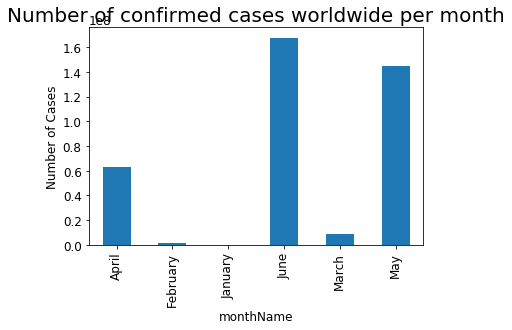

In [29]:
#confirmed cases month wise
axes = df.groupby('monthName')['Confirmed'].sum().plot.bar()
axes.set_ylabel('Number of Cases')
axes.set_title('Number of confirmed cases worldwide per month')

In [20]:
df1 = df[['timestamp' , 'Confirmed']]

In [21]:
by_day_sentiment = df1.groupby([pd.Grouper(key='timestamp', freq='D')]).sum()

In [22]:
by_day_sentiment

,Confirmed
timestamp,
2020-01-22,555
2020-01-23,654
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
...,...
2020-06-18,8488235
2020-06-19,8666045
2020-06-20,8828267


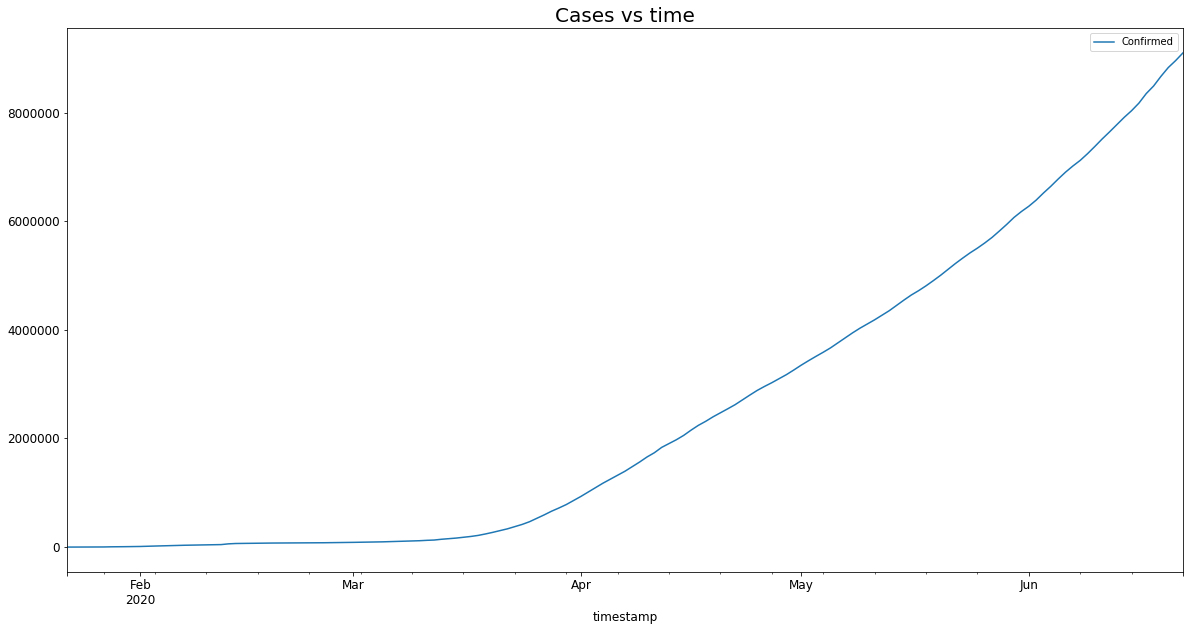

In [23]:
by_day_sentiment.plot(title='Cases vs time',figsize=(20, 10))

In [41]:
df1.rename(columns = {"Country/Region" : "country"} , inplace = True)

In [43]:
df_US=df[df.country=='US']
df_india=df[df.country=='India']
df_brazil=df[df.country=='Brazil']
df_vietnam=df[df.country=='Vietnam']
df_sk=df[df.country=='South Korea']
df_china=df[df.country=='China']

Text(0.5, 1.0, 'Number of confirmed cases in US per month')

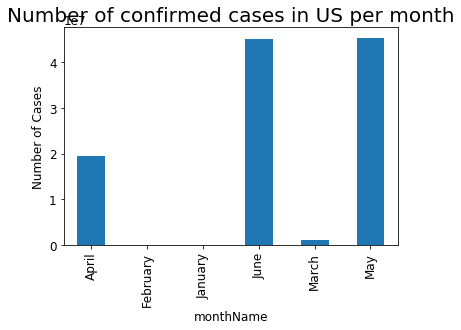

In [44]:
axes = df_US.groupby('monthName')['Confirmed'].sum().plot.bar()
axes.set_ylabel('Number of Cases')
axes.set_title('Number of confirmed cases in US per month')

In [34]:
df_US

,Province/State,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,timestamp,monthName
223,NaN,US,37.0902,-95.7129,2020-01-22,1,0,0,1,Americas,2020-01-22,January
484,NaN,US,37.0902,-95.7129,2020-01-23,1,0,0,1,Americas,2020-01-23,January
745,NaN,US,37.0902,-95.7129,2020-01-24,2,0,0,2,Americas,2020-01-24,January
1006,NaN,US,37.0902,-95.7129,2020-01-25,2,0,0,2,Americas,2020-01-25,January
1267,NaN,US,37.0902,-95.7129,2020-01-26,5,0,0,5,Americas,2020-01-26,January
...,...,...,...,...,...,...,...,...,...,...,...,...
38851,NaN,US,37.0902,-95.7129,2020-06-18,2191052,118432,599115,1473505,Americas,2020-06-18,June
39112,NaN,US,37.0902,-95.7129,2020-06-19,2222579,119124,606715,1496740,Americas,2020-06-19,June
39373,NaN,US,37.0902,-95.7129,2020-06-20,2255119,119719,617460,1517940,Americas,2020-06-20,June
39634,NaN,US,37.0902,-95.7129,2020-06-21,2281290,119977,622133,1539180,Americas,2020-06-21,June


In [45]:
df1_us = df_US[['timestamp' , 'Confirmed']]

In [46]:
by_day_sentiment_US = df1_us.groupby([pd.Grouper(key='timestamp', freq='D')]).sum()

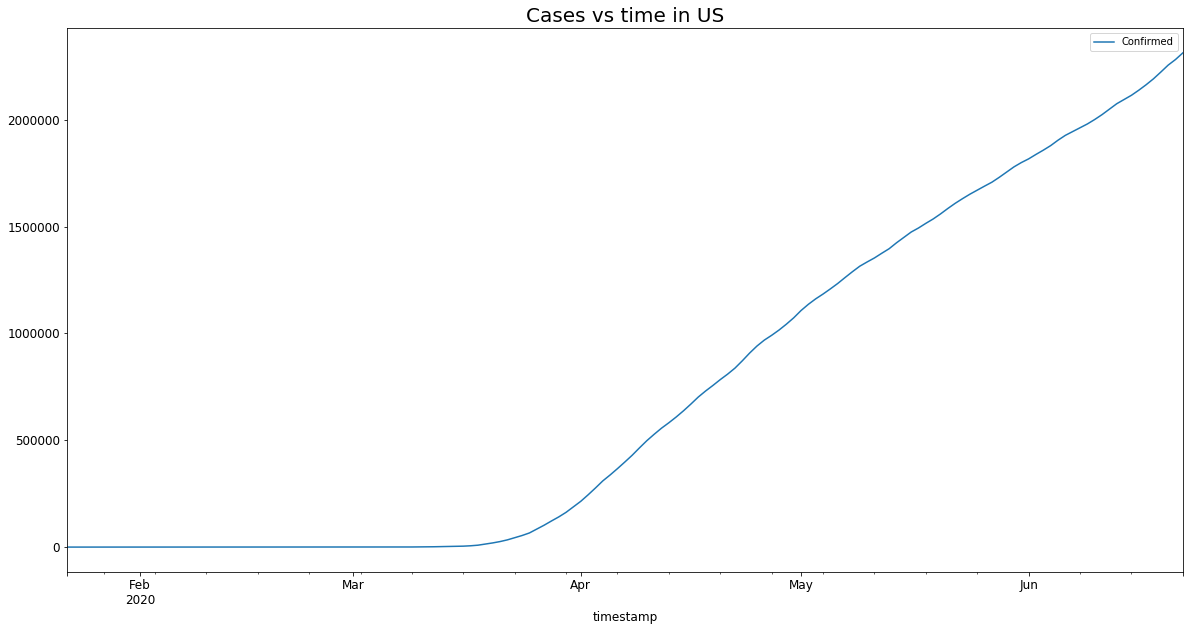

In [47]:
by_day_sentiment_US.plot(title='Cases vs time in US',figsize=(20, 10))

Text(0.5, 1.0, 'Number of confirmed cases in India per month')

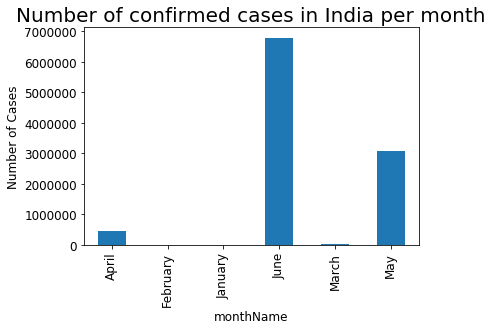

In [50]:
axes = df_india.groupby('monthName')['Confirmed'].sum().plot.bar()
axes.set_ylabel('Number of Cases')
axes.set_title('Number of confirmed cases in India per month')

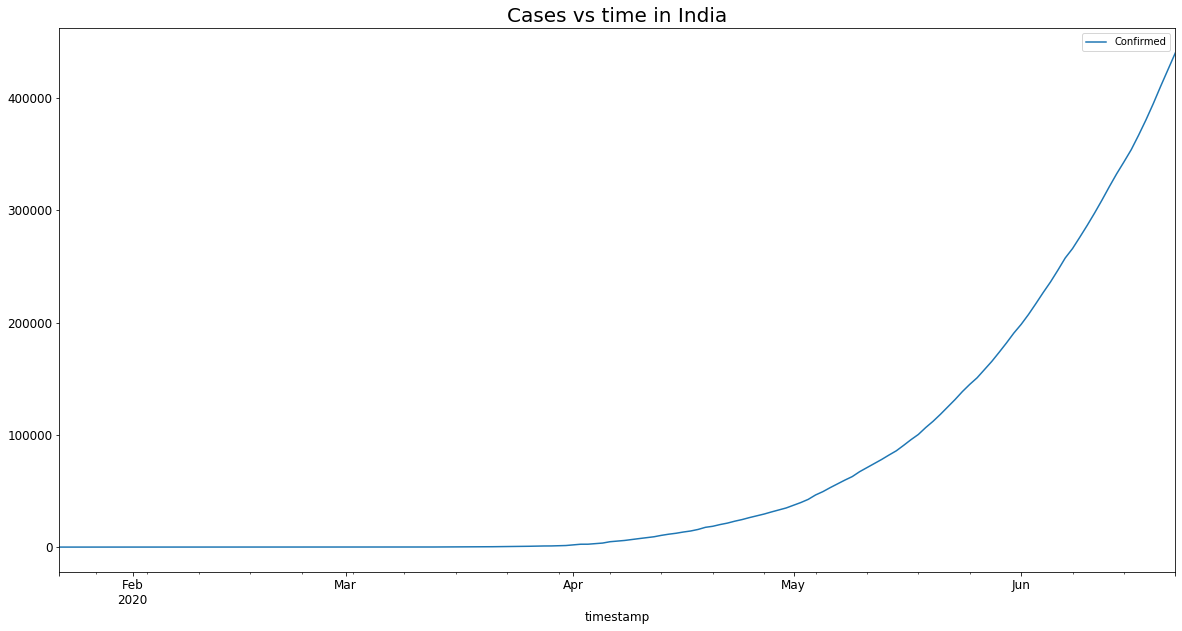

In [51]:
df1_india = df_india[['timestamp' , 'Confirmed']]
by_day_sentiment_india = df1_india.groupby([pd.Grouper(key='timestamp', freq='D')]).sum()
by_day_sentiment_india.plot(title='Cases vs time in India',figsize=(20, 10))

Text(0.5, 1.0, 'Number of confirmed cases in Brazil per month')

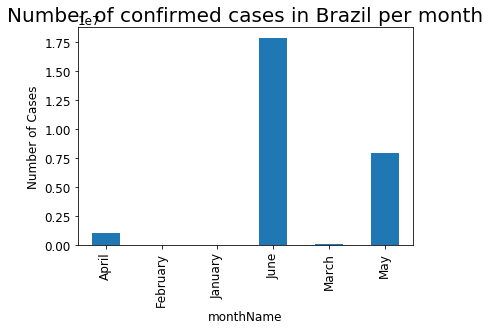

In [55]:
axes = df_brazil.groupby('monthName')['Confirmed'].sum().plot.bar()
axes.set_ylabel('Number of Cases')
axes.set_title('Number of confirmed cases in Brazil per month')

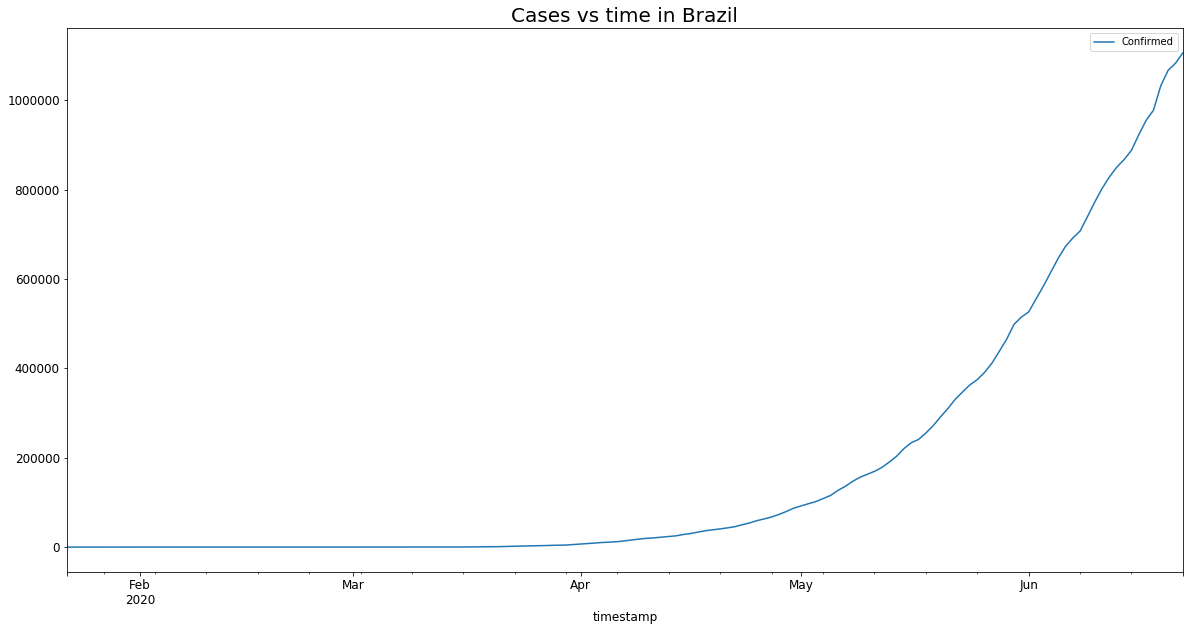

In [53]:
df1_brazil = df_brazil[['timestamp' , 'Confirmed']]
by_day_sentiment_brazil = df1_brazil.groupby([pd.Grouper(key='timestamp', freq='D')]).sum()
by_day_sentiment_brazil.plot(title='Cases vs time in Brazil',figsize=(20, 10))

Text(0.5, 1.0, 'Number of confirmed cases in Vietnam per month')

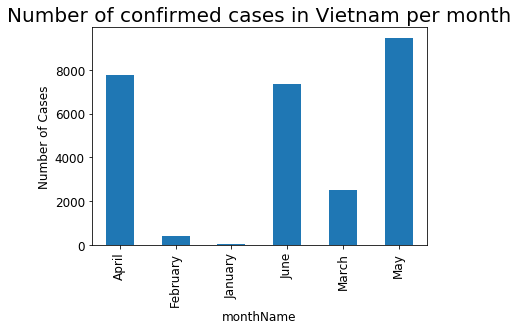

In [54]:
axes = df_vietnam.groupby('monthName')['Confirmed'].sum().plot.bar()
axes.set_ylabel('Number of Cases')
axes.set_title('Number of confirmed cases in Vietnam per month')

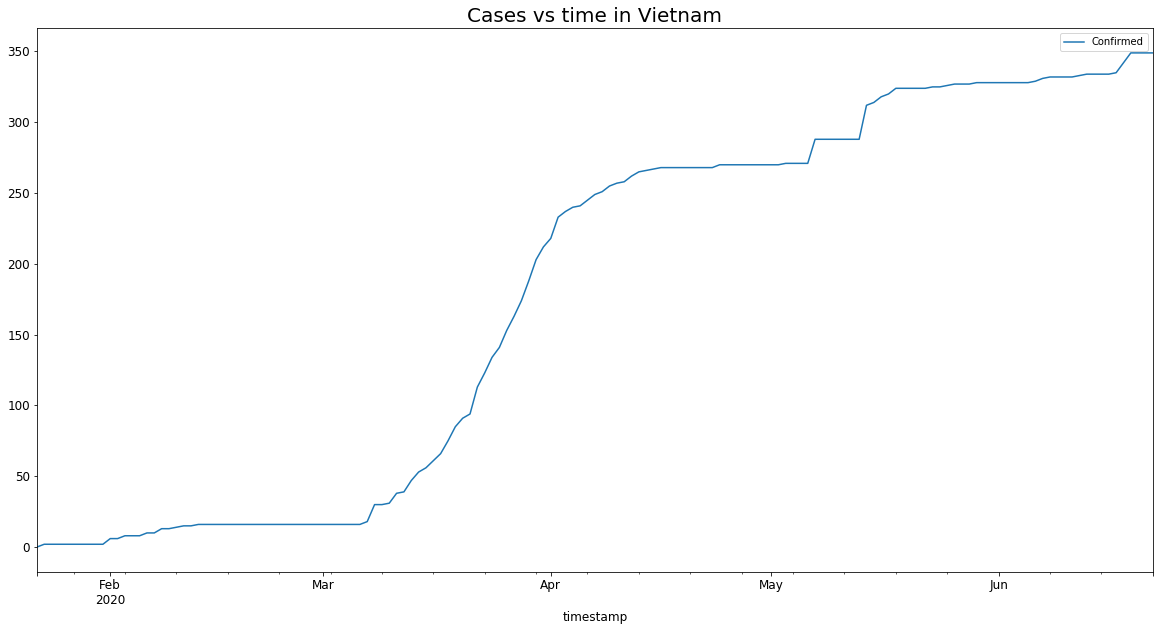

In [56]:
df1_vietnam = df_vietnam[['timestamp' , 'Confirmed']]
by_day_sentiment_vietnam = df1_vietnam.groupby([pd.Grouper(key='timestamp', freq='D')]).sum()
by_day_sentiment_vietnam.plot(title='Cases vs time in Vietnam',figsize=(20, 10))

Text(0.5, 1.0, 'Number of confirmed cases in South Korea per month')

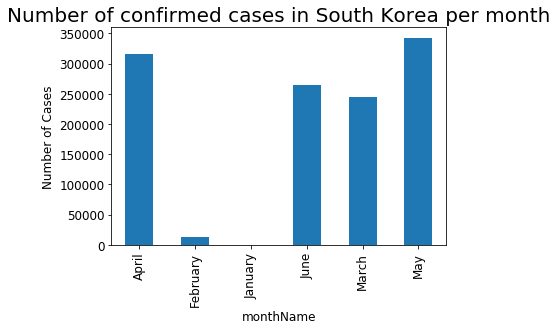

In [57]:
axes = df_sk.groupby('monthName')['Confirmed'].sum().plot.bar()
axes.set_ylabel('Number of Cases')
axes.set_title('Number of confirmed cases in South Korea per month')

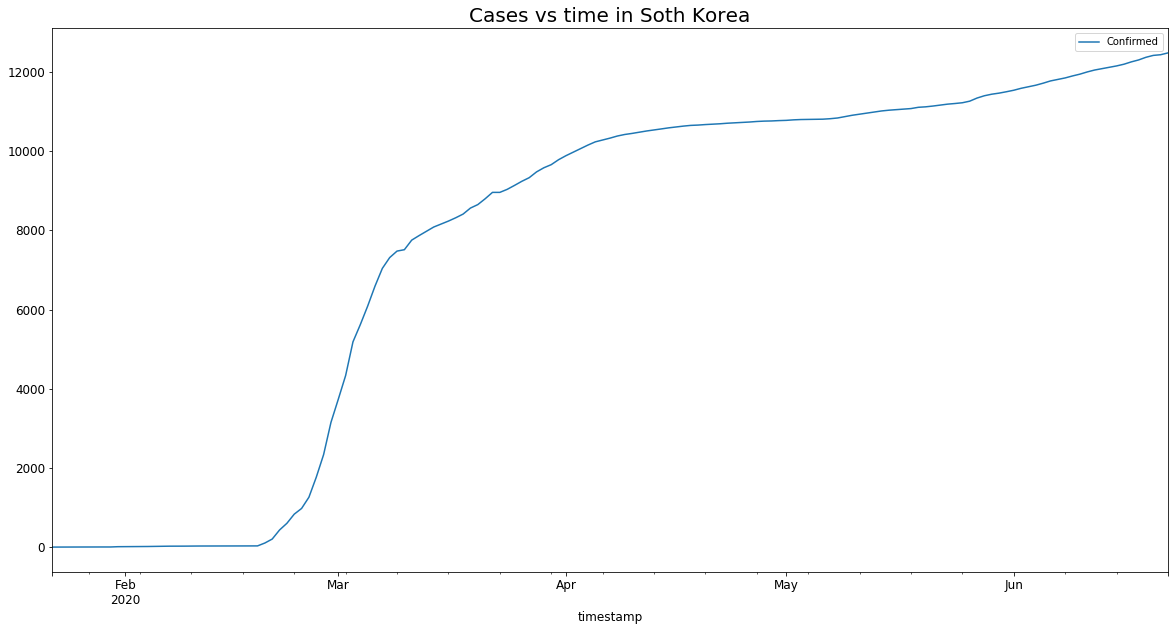

In [59]:
df1_sk = df_sk[['timestamp' , 'Confirmed']]
by_day_sentiment_sk = df1_sk.groupby([pd.Grouper(key='timestamp', freq='D')]).sum()
by_day_sentiment_sk.plot(title='Cases vs time in Soth Korea',figsize=(20, 10))

Text(0.5, 1.0, 'Number of confirmed cases in China per month')

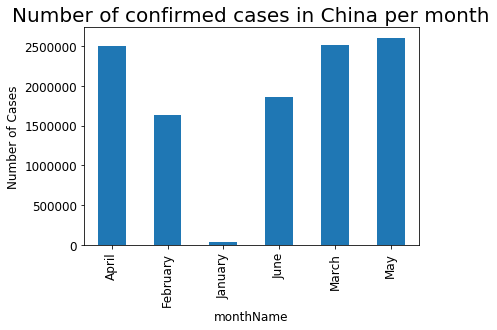

In [60]:
axes = df_china.groupby('monthName')['Confirmed'].sum().plot.bar()
axes.set_ylabel('Number of Cases')
axes.set_title('Number of confirmed cases in China per month')

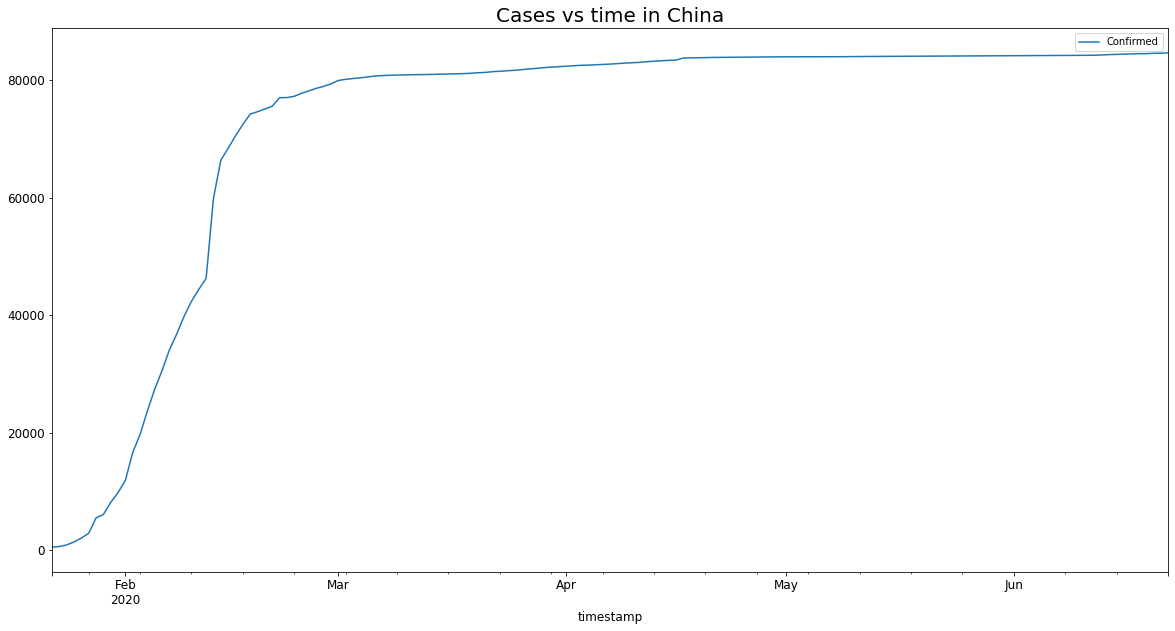

In [61]:
df1_china = df_china[['timestamp' , 'Confirmed']]
by_day_sentiment_china = df1_china.groupby([pd.Grouper(key='timestamp', freq='D')]).sum()
by_day_sentiment_china.plot(title='Cases vs time in China',figsize=(20, 10))